### MNIST Classifier

In this notebook, we will implement a CNN classifier to classify all the 10 digits the MNIST dataset. The objective of this lesson is twofold:
* To build our first CNN classifier.
* To use cross-entropy as classification loss.

Let's start with the ususal imports.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

#### Dataset Loading

We have already inspected the MNIST dataset. We are going to load it now since we are going to use it for training the classifier.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


#### Building the Classifier

We are going to build the same CNN classifier as before but note that we are using the SOFTMAX activation in the last layer (classification head).

In [3]:
inputs = Input(shape=(size, size, 1))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0     

#### Training

Let's now compile and train the model. We will use the CROSS-ENTROPY loss for this task. And note that we can use the built-in accuracy metric for monitoring the training.

In [4]:
epochs = 25
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
422/422 [==============================] - 22s 50ms/step - loss: 0.3870 - accuracy: 0.8918 - val_loss: 0.1100 - val_accuracy: 0.9700
Epoch 2/25
422/422 [==============================] - 20s 46ms/step - loss: 0.1060 - accuracy: 0.9679 - val_loss: 0.0832 - val_accuracy: 0.9763
Epoch 3/25
422/422 [==============================] - 21s 49ms/step - loss: 0.0779 - accuracy: 0.9766 - val_loss: 0.0588 - val_accuracy: 0.9842
Epoch 4/25
422/422 [==============================] - 19s 46ms/step - loss: 0.0634 - accuracy: 0.9811 - val_loss: 0.0600 - val_accuracy: 0.9847
Epoch 5/25
422/422 [==============================] - 21s 49ms/step - loss: 0.0547 - accuracy: 0.9840 - val_loss: 0.0507 - val_accuracy: 0.9853
Epoch 6/25
422/422 [==============================] - 23s 54ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0505 - val_accuracy: 0.9853
Epoch 7/25
422/422 [==============================] - 19s 46ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0422 - val_accuracy:

Let's now plot the history to see the evolution of the training.

Train Acc      0.9966481328010559
Validation Acc 0.9898333549499512


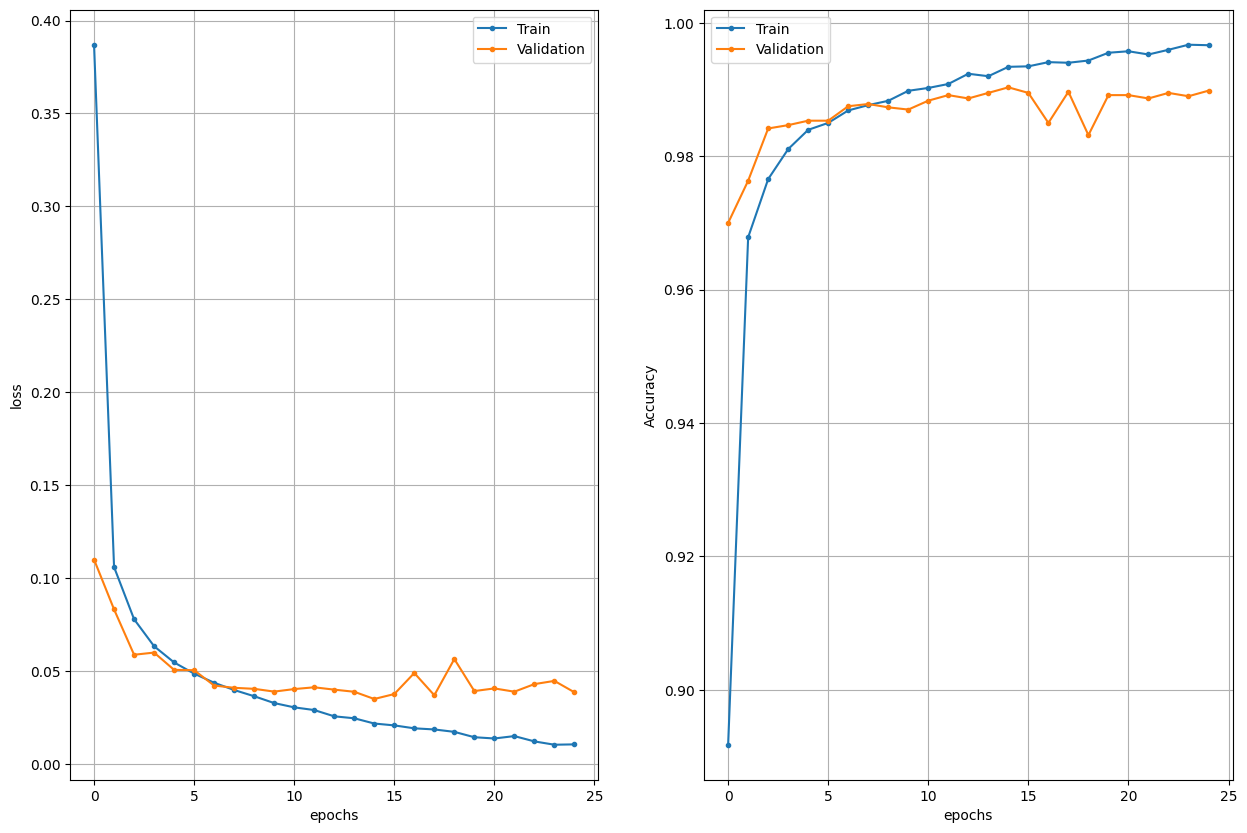

In [5]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

plot_history(history)

We have obtained an overall accuracy of about 99%. This might seem lower than we obtained using the binary classifier before but remember we are now classifying **all 10 digits**.

In [6]:
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 [==============================] - 2s 5ms/step
True [7 2 1 0 4]
Pred [7 2 1 0 4]
Pred [[1.60448606e-14 1.21091602e-12 1.01124475e-09 3.90621757e-08
  1.08616008e-16 1.44362576e-13 1.88934295e-25 9.99999940e-01
  1.26570293e-12 1.05784870e-09]
 [6.85703994e-11 2.60338129e-09 9.99999940e-01 1.37554688e-15
  1.33368997e-13 1.75828357e-16 6.21058094e-10 9.32048585e-17
  7.37826467e-12 1.41669404e-18]
 [1.01930935e-08 9.99882281e-01 2.02775752e-08 1.65392722e-09
  9.16549980e-05 1.73178503e-08 1.31903577e-09 2.23327406e-05
  3.63808522e-06 1.83175501e-08]
 [9.99999821e-01 3.69162872e-16 1.28322180e-08 2.16116274e-12
  1.12711185e-09 1.54303709e-10 1.60755036e-07 6.81840218e-13
  1.71088654e-08 7.32070360e-09]
 [1.64673942e-17 5.90843663e-17 7.27189051e-15 5.94420744e-15
  9.99999940e-01 2.65915174e-17 3.17990753e-16 1.18886753e-13
  1.30511938e-11 3.35145991e-08]]
(10000, 10)


In [7]:
digits = range(0, 10)
y_pred = np.argmax(y_pred, axis=1)

for digit in digits:
    mask = y_true == digit

    tp = np.sum(y_pred[mask] == digit)
    total = np.sum(mask)

    print('Digit-', digit, ' acc', tp/total)

print('y_true', y_true[mask])
print('y_pred', y_pred[mask])

Digit- 0  acc 0.9948979591836735
Digit- 1  acc 0.9920704845814978
Digit- 2  acc 0.9835271317829457
Digit- 3  acc 0.9930693069306931
Digit- 4  acc 0.9959266802443992
Digit- 5  acc 0.9876681614349776
Digit- 6  acc 0.9812108559498957
Digit- 7  acc 0.9883268482490273
Digit- 8  acc 0.9876796714579056
Digit- 9  acc 0.9781962338949455
y_true [9 9 9 ... 9 9 9]
y_pred [9 9 9 ... 9 9 9]


The trained model can also be quickly evaluated by calling the evaluate method on the test data. It will return the loss and the metric (or metrics).

In [8]:
ev = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0437 - accuracy: 0.9883


In [9]:
print('Test loss  ', ev[0])
print('Test metric', ev[1])

Test loss   0.04373849555850029
Test metric 0.9883000254631042


We now visualise some of the evaluation results.

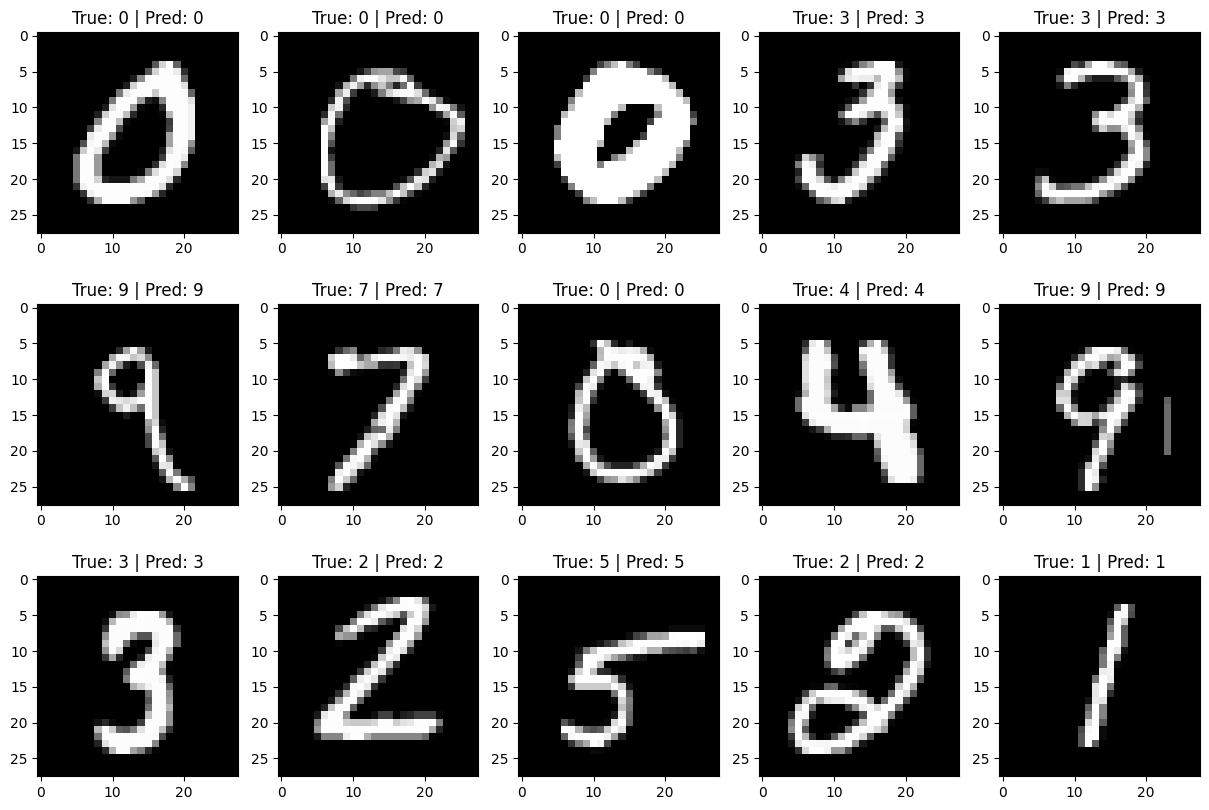

In [10]:
for ii in range(15):
    idx = np.random.randint(0, len(y_pred))
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...], cmap='gray')
    plt.title('True: ' + str(y_true[idx]) + ' | Pred: ' + str(y_pred[idx]))